<a href="https://colab.research.google.com/github/takashinnosuke/study_Keras/blob/main/RNN_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#単純なRNNのNumpy実装
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
#IMDbデータの前処理
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = \
  imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (sampls x time)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (sampls x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
#Embedding層とSimpleRNN層を使ってモデルを訓練
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(input_train, y_train,
                    epochs = 10, batch_size = 128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 28s 166ms/step - loss: 0.6432 - acc: 0.6151 - val_loss: 0.4889 - val_acc: 0.7948
Epoch 2/10
157/157 [==============================] - 29s 188ms/step - loss: 0.4077 - acc: 0.8292 - val_loss: 0.4343 - val_acc: 0.8110
Epoch 3/10
157/157 [==============================] - 34s 217ms/step - loss: 0.2844 - acc: 0.8877 - val_loss: 0.3815 - val_acc: 0.8336
Epoch 4/10
157/157 [==============================] - 28s 180ms/step - loss: 0.2182 - acc: 0.9179 - val_loss: 0.4213 - val_acc: 0.8262
Epoch 5/10
157/157 [==============================] - 31s 197ms/step - loss: 0.1578 - acc: 0.9433 - val_loss: 0.4607 - val_acc: 0.7934
Epoch 6/10
157/157 [==============================] - 27s 169ms/step - loss: 0.1063 - acc: 0.9635 - val_loss: 0.4725 - val_acc: 0.8018
Epoch 7/10
157/157 [==============================] - 26s 168ms/step - loss: 0.0646 - acc: 0.9811 - val_loss: 0.5881 - val_acc: 0.8012
Epoch 8/10
157/157 [==============================] - 2

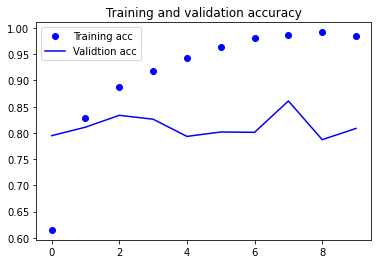

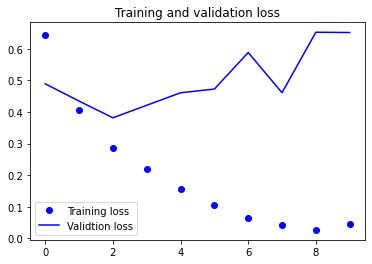

In [7]:
#結果をプロット
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validtion acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validtion loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()